# 1. Laboratorijske vježbe iz Numeričke matematike (zad6) 

Ime i prezime: *Tomislav Bjelčić*

Zadan je rubni problem 
$$-a u''(x)-u'(x)=x \quad 0<x<1\quad a>0$$
$$u(0)=0, \quad u(1)=0$$

a) Ovaj problem ima analitičko rješenje koje je jednako
$$u(x)=\frac{e^{-\frac{x}{a}}((x-1)e^{\frac{x+1}{a}}(2a-x-1)+xe^{\frac{x}{a}}(x-2a)+\sqrt[a]{e}(2a-1))}{2(\sqrt[a]{e}-1)}$$
Koristeći biblioteku **matplotlib** nacrtajte ovo rješenje za dva volji odabrana $a.$ 

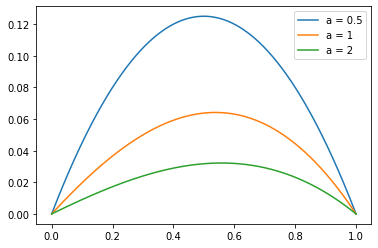

In [11]:
# Nadopuni. Ovdje plotati funkciju
import numpy as np
import matplotlib.pyplot as plt

def exact_solution(x, a):
    a_root_e_inv = np.exp(-1.0 / a)
    a_root_e_x_inv = np.exp(-x / a)
    c2 = (a - 0.5)/(1 - a_root_e_inv)
    return -c2 + c2 * a_root_e_x_inv - 0.5*x*x + a*x

""" def exact_solution_other(x, a):
    return np.exp(-x / a) * ((x-1)*np.exp((x+1)/a) * (2*a - x - 1) + x*np.exp(x/a)*(x - 2*a) + np.exp(1/a)*(2*a-1)) / (2*(np.exp(1/a) - 1)) """


xs = np.linspace(0.0, 1.0, endpoint=True, num=1000)
a_list = [0.5, 1, 2]
a_list_extended = [0.01, 0.1, 0.25, 0.5, 1, 2, 4, 10, 100]

for a in a_list:
    ys = exact_solution(xs, a)
    plt.plot(xs, ys, label=f"a = {a}")
    """ ys_other = exact_solution_other(xs, a)
    err = np.linalg.norm(ys - ys_other, ord=1)
    print(f"Error for a={a} : {err}") """
    

plt.legend(loc="best")
plt.show()

b) Koristeći centralne diferencije diskretizirajte rubni problem kao što smo to radili na predavanjima (u 4. predavanju -trodijagonalni sustavi te u prošlogodišnjem 7. predavanju, drugi dio predavanja)
Ovdje u Markdown ćeliju zapišite koji sustav dobivate za ako uzmete uniformnu mrežu na [0,1], odnosno točke $$\{x_0=0,x_1,x_2,\ldots , x_n, x_{n+1}=1\},$$ gdje je $$x_i=x_0+ih, \ i=1,2,3,\ldots, n.$$
Sustav zapišite za $n=5$. (Pisanje matrica provjerite u nekom od *.ipynb s predavanja )

Neka je $u_{i} \mathrel{\mathop:}= u(x_i), \, i = 0, 1, \dots, n+1$. \
Poznato je $u_0 = 0$ i $u_{n+1} = 0$, a ostale vrijednosti $u_i$ su nepoznate. \
Nakon diskretizacije rubnog problema dobiveni sustav za $n = 5$ je 
$$\begin{alignat*}{6}
    4au_1 & {}+{} & (-2a - h)u_2 &  &  &  &  &  &  &  & {}={} 2 h^2 x_1 \\
    (-2a + h) u_1 & {}+{} & 4au_2 & {}+{} & (-2a - h)u_3 & &  &  &  &  & {}={} 2 h^2 x_2 \\
     &  & (-2a + h) u_2 & {}+{} & 4au_3 & {}+{} & (-2a - h) u_4 &  &  &  & {}={} 2 h^2 x_3 \\
     &  &  &  & (-2a + h) u_3 & {}+{} & 4au_4 & {}+{} & (-2a - h) u_5 & & {}={} 2 h^2 x_4 \\
     &  &  &  &  &  & (-2a + h) u_4 & {}+{} & 4a u_5 &  & {}={} 2 h^2 x_5 \\
\end{alignat*}$$

Sustav u matričnom obliku:
$$\begin{bmatrix}
4a      &   -2a - h      & 0         &   0         &   0  \\
-2a+h    &   4a    &  -2a - h     &   0         &   0   \\
0           &  -2a+h   &   4a  &   -2a - h      &   0   \\   
0           &   0         & -2a+h  &   4a    &   -2a - h   \\
0           &   0         & 0         &   -2a+h  &   4a   \\
            \end{bmatrix}
  
\begin{bmatrix}
u_1     \\
u_2     \\
u_3  \\
u_4     \\
u_5 \\
            \end{bmatrix}

    = 2 h^2
\begin{bmatrix}
x_1     \\
x_2     \\
x_3  \\
x_4     \\
x_5 \\
            \end{bmatrix}
            
$$


c) Neka je sada $a=2$ i $n=16$. Riješite dobiveni sustav Thomasovim algoritmom te skicirajte dobivenu aproksimaciju. 

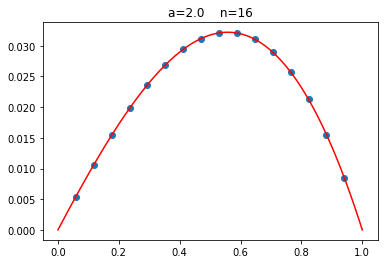

In [12]:
# Ovdje sada ide slika grafa analitičkog rješenja za a=2 i aproksimacije koju ste dobili (u_i=u(x_i) 
# su aproksimaxije rješenja u točkama mreže

def LUdecomptridiagonal(a,b,c):
    n=len(b)
    for k in range(1,n):
        mu=a[k-1]/b[k-1]
        b[k]=b[k]-mu*c[k-1]
        a[k-1]=mu
    return a,b,c

def LUsolvetridiagonal(a,b,c,f):
    n=len(b)
    for k in range(1,n):
        f[k]=f[k]-a[k-1]*f[k-1]
    f[n-1]=f[n-1]/b[n-1]
    for k in range(n-2,-1,-1):
        f[k]=(f[k]-c[k]*f[k+1])/b[k]
    return f


def set_abcf(x, a_param):
    n = len(x)-2
    h = 1.0/(n+1)
    b = np.full(n, 4*a_param)
    a = np.full(n-1, -2*a_param + h)
    c = np.full(n-1, -2*a_param - h)
    f = (2*h*h)*x[1:n+1]
    return a, b, c, f


def task_solution(a_param, n):
    mesh = np.linspace(0.0, 1.0, endpoint=True, num=n+2)
    a,b,c,f = set_abcf(mesh, a_param)

    LUdecomptridiagonal(a,b,c)
    LUsolvetridiagonal(a,b,c,f) # f sadrži rješenje

    plt.plot(xs, exact_solution(xs, a_param), color="r")
    plt.scatter(mesh[1:n+1], f)
    plt.title(f"a={a_param}    n={n}")
    plt.show()


task_solution(a_param=2.0, n=16)


d) Neka je sada $a=0.01$ i $n=16$. Riješite dobiveni sustav Thomasovim algoritmom te skicirajte dobivenu aproksimaciju 

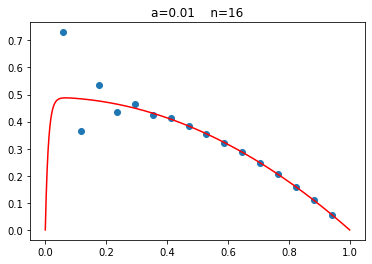

In [13]:
# sada napravite graf koji skicira analitičko rješenje za a=0.01 i točke (x_i, u_i), gdje ste  u_i dobili 
# kao rješenje sustava

task_solution(a_param=0.01, n=16)

e)  Sve isto kao po c) i d) za $n=100$

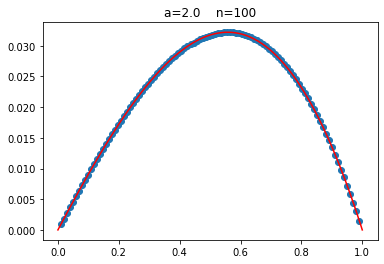

In [14]:
#Ovdje su grafovi

task_solution(a_param=2.0, n=100)

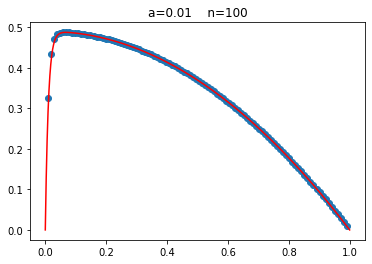

In [15]:
task_solution(a_param=0.01, n=100)